In [1]:
import sys
import os

# Add parent directory to path to access modules
sys.path.insert(0, os.path.abspath('..'))

import xarray as xr
import matplotlib.pyplot as plt
import torch
import pandas as pd
import seaborn as sns
import numpy as np
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
from esda.moran import Moran
from libpysal.weights import KNN
from eval.metrics import *
from eval.plot import *
import data.valid_crd as valid_crd
import glob
import os
import yaml
import data.helper as helper
from matplotlib.colors import ListedColormap
import math
import scipy.stats as stats
import statsmodels.api as sm
from collections import defaultdict

In [2]:
test_period = [1970, 2014]
# exps  = ['7f6b6147', '01f207a2', 'bd2a18cf', '81772f95', 'a6ae5437', 'd69030f6']
# testep = [50, 150, 50, 300, 300, 300]

# exps  = ['0bc32e5c', 'd6dd3dc9', 'bd9fce10', 'a4cda17c', '92e4a6e2', 'b1f79580']
# testep = [50, 150, 50, 300, 300, 300]

# exps  = ['b0b08c15', '6e42ae02', 'd05a4982', 'bf83c12a', '4fd5c2c5', '0cc8e8e0'] #MLP Lag3
# testep = [150, 150, 100, 300, 350, 300]

# exps = ['23ca8aae', '24e718ee', 'd52dc492', '81a6ca20', '8804581d', 'b1cf2024'] #LSTM 0.5Q degree1
# testep = [150, 50, 150, 150, 150, 100]

# exps = ['7131027e', '660a00db', '1a8f8f83', '7d6b3133', '48e38afd', 'b778b279'] #LSTM 0.5Q degree2
# testep = [300, 200, 200, 200, 200, 200]

# exps = ['7131027e', '24e718ee', '1a8f8f83', '7d6b3133', '8804581d', 'b1cf2024'] #LSTM finetuned
# testep = [300, 50, 200, 200, 150, 100]

# exps = ['702f7fb3', 'b15a0ca9', 'a74dcb32', '0b4ccf4d', '73f7994b', 'b1cf2024'] #LSTM 2 layer 0.5Q degree1
# testep = [50, 50, 100, 150, 100, 100]

# exps = ['702f7fb3', 'b15a0ca9', 'a74dcb32', '0b4ccf4d', '73f7994b', 'b1cf2024'] #LSTM 2 layer rho365
# testep = [50, 50, 100, 150, 100, 100]

# exps = ['d3a42bc0', 'be0199d2', '83c6e521', 'ca07700d', '51f4dde2', '202cb162'] #MLP 4 layers, 3lag, lossQ_rainy, wet_dry_flag, gridmet
# testep = [250, 220, 10, 340, 400, 40]

#best so far-->
# exps = ['d3a42bc0', '23735762', '8960cf1e', 'ca07700d', '51f4dde2', '202cb162'] #MLP 4 layers, 3lag, 0.5-0.9Q, lossQ_rainy, wet_dry_flag, gridmet
# testep = [250, 370, 250, 340, 400, 40]

# exps = ['4f247c2c', 'a05ea2a6', 'df6c4a40', 'd342ec98', '69b2b62d', '5de56b3a'] #MLP 4 layers, 3lag, 0.5-0.9Q, lossQ_rainy, wet_dry_flag, pca gridmet
# testep = [10, 200, 400, 380, 220, 110]

# exps = ['bdf401eb', '8718747e', '7d4037ce', 'd3824839', '4da81e46', 'd987750b'] #MLP 4 layers, 3lag, lossQ_rainy, wet_dry_flag, livneh
# testep = [70, 290, 70, 380, 360, 290]

# exps = ['f9b9cfcd', 'aef82e47', '17688a3a', 'e8f67424', 'd3ea26c6', '0080f321'] #LSTM rho365, lossQ_rainy, wet_dry_flag, gridmet
# testep = [180, 250, 390, 40, 300, 40]

# exps = ['59eb8828', '9b3e4370', 'f1ed5d3a', '8c6b9330', '65a9f7bf', 'd0594b3b'] #LSTM 2/3 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# # testep = [280, 130, 270, 360, 130, 20]

# exps = ['2c65c6aa', 'c6c0ed51', 'eba5d440', '8c6b9330', '65a9f7bf', 'ab9d8b4d'] #LSTM 2 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [150, 300, 300, 200, 150, 200]

# exps = ['21372c82', '60b5bb40', 'dbaab2ec', 'a521be1a', 'ce819d61', 'ee211d10'] #LSTM 3 degree, rho 365, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [250, 200, 300, 200, 200, 150]

# exps = ['b9905a36', '00acd0dc', 'f1ed5d3a', '74438819', '89f0b401', 'a0ba6ff3'] #LSTM 2/3 layers, rho 365, quantileOnly, learning rate: 1e-4, wet_dry_flag, gridmet
# testep = [200, 330, 270, 390, 200, 10]

# exps = ['37c36ddc', '14876434', '8b4a26d2', '28b0f150', '8aadc0a7', 'bc539302'] #CNN with kernel_size=3, base_dilation=2, dropout=0.1, causal=False, gridmet
# testep = [500, 40, 90, 330, 430, 30]

# exps = ['90bd73be', '7a760640', '3c92aa64', 'fc9e7d1a', '764effb6', 'bd98efe0'] #MLP (4Layers) + LSTM (3Layers), gridmet
# testep = [300, 200, 200, 300, 300, 300]

# exps = ['7bc10753', '7c2bef5f', '34420e7d', '07931267', '4a15b644', '3db048bc'] #MLP (4Layers)/ LSTM (4Layers), wet day transform only, gridmet
# testep = [400, 400, 400, 400, 390, 380]

# exps = ['dd06f7f0', 'd2fa6ed5', 'faeee960', 'b14b088a', 'c359cb58', '0431cb9a'] #LSTM, totalP Loss, gridmet
# testep = [180, 190, 280, 90, 390, 40]

# exps = ['8d72734c', 'a16f1e6e', 'ada5fa25', '9cdcdf6f', '4e1f7860', '0431cb9a'] #LSTM, totalP Loss, livneh
# testep = [90, 410, 280, 120, 310, 40]

# exps = ['163bdb35', 'b9622048', '18b01397', 'fb9f5cc8', 'a8d39a59', 'a79b1f31'] #MLP, lr1e-4, gridmet
# testep = [400, 480, 490, 500, 500, 390]

# exps = ['e2842f24', 'b9622048', 'd8492afe', '30f294a3', 'a8d39a59', 'a79b1f31'] #MLP, lr1e-4, gridmet ##higher weight to Rx5/R20
# testep = [400, 500, 490, 500, 500, 340]


# exps = ['678156f3', 'ff4859c5', 'ebfce2f4', 'aa156b4f', '8ad4f07b', '8884749e'] #MLP, lr1e-4, livneh ##higher weight to Rx5/R20
# testep = [150, 210, 260, 440, 430, 350]

# exps = ['37c36ddc', '14876434', '8b4a26d2', '28b0f150', '8aadc0a7', 'bc539302'] #CNN with kernel_size=3, base_dilation=2, dropout=0.1, causal=False, gridmet
# testep = [500, 40, 90, 330, 430, 30]

# exps = ['ba85203e', '17f58961', '69b4ddfb', 'c35db6f7', 'db0b4a1d', 'd9a54f3a'] #MLP, monotone8, lr1e-4, gridmet
# testep = [500, 480, 500, 310, 500, 500]


# exps = ['ba85203e', '1577aa1c', '2645444d', 'c35db6f7', '0615af33', 'd9a54f3a'] #MLP, LSTM monotone8, lr1e-4, gridmet
# testep = [500, 500, 30, 310, 30, 500]

# exps = ['306e4f65', '3153d07e', 'e47ca2cd', '4a5d0e60', '9b6c9ae2', '06d4986d'] #spatio_temp monotone8, lr1e-4, gridmet
# testep = [20, 10, 30, 30, 50, 10]

# exps = ['92cf15a0', 'd02b8c7d', 'c648a65c', 'dfd06ae0', '2aa90ccb', '0f0cb888'] #spatio_temp, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [30, 10, 30, 20, 260, 10]

# exps = ['9340d841', '603d794d', '9fb6a37a', 'b07bb1cb', '303a01d1', 'd7704903'] #spatio_temp, spatialCorrloss poly, lr1e-4, gridmet
# testep = [480, 10, 160, 280, 70, 160]

# exps = ['9082172b', '3e82182e', '88e0fb6d', '5e34c201', '11c9efca', '8100750c'] #spatio_tempLSTM, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [50, 30, 180, 160, 200, 10]

# exps = ['ffb540df', 'd82391d1', '36848cf6', 'a9610bfd', '7ff478e2', '60537d91'] #spatio_tempMLP, spatialCorrloss monotone8, lr1e-4, gridmet
# testep = [50, 20, 100, 200, 440, 110]


# exps = ['e30509fd', 'c275c9e5', '29704835', 'e90810f5', 'd2e4cf63', '32a58fb9'] #spatio_tempConv, spatialCorrloss monotone8, lr1e-4, livneh
# testep = [10, 10, 40, 20, 20, 10]


# exps = ['6bc76723', '1ce8bbc8', 'bdcb6466', 'e97a3263', 'c1f3e42c', 'a08bd955'] #spatio_tempConv, spatialCorrloss monotone12, lr1e-4, livneh
# testep = [10, 20, 40, 20, 30, 10]

# exps = ['6bc76723', '1ce8bbc8', 'bdcb6466', 'e97a3263', '819bdae8', 'a08bd955'] #spatio_tempConv, spatialCorrloss monotone12, lr1e-4, livneh, v2
# testep = [10, 20, 40, 20, 30, 10]

# exps = ['c7955274', '14a22e16', '95524b55', '121089fc', 'cbe955b5', '41d7b1ab'] #spatio_tempMLP+LSTM, spatialCorrloss monotone8, lr1e-4, livneh, v2
# testep = [250, 90, 220, 10, 50, 420]

# exps = ['8da4399d', 'fd9aecb6', '5e0ea34a', '4e3619e9', '4cce80a1', '9edf9ab6'] #spatio_tempConv1d+MLP, spatialCorrloss monotone8, lr1e-4, livneh, v2
# testep = [10, 40, 30, 10, 20, 10]

# exps = ['6a3f661e', 'c9759aa6', '2e28dacb', 'dc317fe4', '02ffe376', 'a01d3d46'] #LOCAspatio_tempConv1d, spatialCorrloss monotone8, lr1e-4, livneh, v2
# testep = [10, 10, 30, 10, 40, 10]

exps = ['25a17fec', 'da05f334', '6389636d', 'c340c2c9', '1c2584ad', '4f2a1b9c'] #AdamW, LOCAspatio_tempConv1d, harmonic2, spatialCorrloss monotone8, lr1e-4, livneh
testep = [20, 70, 10, 80, 20, 30]
    
save_path = '/pscratch/sd/k/kas7897/dCLIMAD_BA/plots/#AdamW, LOCAspatio_tempConv1d, harmonic2, spatialCorrloss monotone8, lr1e-4, livneh/'

os.makedirs(save_path, exist_ok=True)

def load_model_run(run_id, est_period, epoch=None, base_dir='/pscratch/sd/k/kas7897/dCLIMAD_BA/outputs/outputs_AdamW_harmonic/jobs_LOCAspatioTempConv1d'):
    run_path = helper.load_run_path(run_id, base_dir)

    flat_dir = os.path.join(run_path, f"{test_period[0]}_{test_period[1]}")

    future_path = os.path.join(run_path, "ssp5_8_5_2015_2099")

    # Check which structure exists
    data_path = flat_dir
    config_path = os.path.join(run_path, 'train_config.yaml')

    x = torch.load(os.path.join(data_path, 'x.pt'), map_location='cpu').squeeze(-1).numpy()
    x[x<0.254] = 0 
    y = torch.load(os.path.join(data_path, 'y.pt'), map_location='cpu').squeeze(-1).numpy()
    y[y<0.254] = 0
    time = torch.load(os.path.join(data_path, 'time.pt'), map_location='cpu')

    xt = None
    if epoch is not None:
        xt_path = os.path.join(data_path, f'ep{epoch}', 'xt.pt')
        if os.path.exists(xt_path):
            xt = torch.load(xt_path, map_location='cpu')
        else:
            print(run_id)
        xt[xt<0.254] = 0

    
    # future_x= None; future_xt = None; future_time = None
    future_x = torch.load(os.path.join(future_path, 'x.pt'), map_location='cpu').squeeze(-1).numpy()
    future_x[future_x<0.254] = 0 
    future_time = torch.load(os.path.join(future_path, 'time.pt'), map_location='cpu')

    
    future_xt = torch.load(os.path.join(future_path, 'xt.pt'), map_location='cpu')
    future_xt[future_xt<0.254] = 0

    with open(config_path, 'r') as f:
        config = yaml.safe_load(f)

    return {
        'run_path': run_path,
        'x': x,
        'y': y,
        'time': time,
        'xt': xt,
        'future_x': future_x,
        'future_xt': future_xt,
        'future_time': future_time,
        'config': config
    }

models = []
for i in range(len(exps)):
    model = load_model_run(exps[i], test_period, epoch=testep[i])
    models.append(model)

In [3]:
valid_coords = []
loca_all = []
QM_all = []

loca_future_all = []
QM_future_all = []

for i in range(len(models)):
    
    cmip6_dir = models[i]['config']['cmip_dir']
    clim = models[i]['config']['clim']
    ref = models[i]['config']['ref']
    train_period = [models[i]['config']['train_start'], models[i]['config']['train_end']]
    # future_period = [models[i]['config']['trend_start'], models[i]['config']['trend_end']]
    future_period = [2015, 2099]

    ds_sample = xr.open_dataset(f"{cmip6_dir}/{clim}/historical/precipitation/clipped_US.nc")

    shapefile_path = None if not  models[i]['config']['spatial_test']  else models[i]['config']['shapefile_filter_path']
    
    try:
        spatial_extent = models[i]['config']['spatial_extent_test']
    except:
        spatial_extent = models[i]['config']['spatial_extent_val']

    valid_coords.append(valid_crd.valid_lat_lon(ds_sample, var_name='pr', shapefile_path=shapefile_path, attrList=spatial_extent))


    #loading loca

    loca = xr.open_dataset(f'{cmip6_dir}/{clim}/historical/precipitation/loca/coarse_USclip.nc')
    loca = loca['pr'].sel(lat=xr.DataArray(valid_coords[i][:, 0], dims='points'),
                                        lon=xr.DataArray(valid_coords[i][:, 1], dims='points'),
                                        method='nearest')
    loca = loca.sel(time =slice(f'{test_period[0]}', f'{test_period[1]}')).values

    #unit conversion
    loca_all.append(loca*86400)



    # if 'QM' in method_names:
    QM_bench = f'/pscratch/sd/k/kas7897/dCLIMAD_BA/benchmark/QuantileMapping/conus/{clim}-{ref}/{train_period}_historical_{test_period}.pt'
    QM_debiased = torch.load(QM_bench, weights_only=False).squeeze(-1)
    QM_all.append(QM_debiased*86400)

    QM_future_bench = f'/pscratch/sd/k/kas7897/dCLIMAD_BA/benchmark/QuantileMapping/conus/{clim}-{ref}/{train_period}_ssp5_8_5_{future_period}.pt'
    QM_future_debiased = torch.load(QM_future_bench, weights_only=False).squeeze(-1)
    QM_future_all.append(QM_future_debiased*86400)

    # loca_future = xr.open_dataset(f'{cmip6_dir}/{clim}/ssp5_8_5/precipitation/loca/coarse_USclip.nc')
    # loca_future = loca_future['pr'].sel(lat=xr.DataArray(valid_coords[i][:, 0], dims='points'),
    #                                     lon=xr.DataArray(valid_coords[i][:, 1], dims='points'),
    #                                     method='nearest')
    # #filter loca_future based on models[i]['future_time']
    # loca_future = loca_future.sel(time=slice(f'{models[i]["future_time"][0]}', f'{models[i]["future_time"][-1]}')).values
    
    # #unit conversion
    # loca_future_all.append(loca_future*86400)

In [4]:
## this block filters 'y' based on 'x' calender
counter = 0
for model in models:
    time = model['time']
    
    x_time_np = np.array([pd.Timestamp(str(t)) for t in time])
    x_time_np = np.array([pd.Timestamp(t).replace(hour=0, minute=0, second=0) for t in x_time_np], dtype='datetime64[D]')
    # Generate a daily time array following the standard Gregorian calendar
    y_time = pd.date_range(start=f"{test_period[0]}-01-01", end=f"{test_period[1]}-12-31", freq="D")

    # Convert to NumPy array for indexing and comparison
    y_time_np = y_time.to_numpy()

    # Find indices where observed time matches model time
    matched_indices = np.where(np.isin(y_time_np, x_time_np))[0]

    model['y'] = model['y'][matched_indices,:]
    model['x_time_np'] = x_time_np

    loca_all[counter] = loca_all[counter][matched_indices, :]

    future_time = model['future_time']

    # future_period = [model['config']['trend_start'], model['config']['trend_end']]
    future_period = [2015, 2099]


    future_x_time = np.array([pd.Timestamp(str(t)) for t in future_time])
    future_x_time = np.array([pd.Timestamp(t).replace(hour=0, minute=0, second=0) for t in future_x_time], dtype='datetime64[D]')

    future_all_time = pd.date_range(start=f"{future_period[0]}-01-01", end=f"{future_period[1]}-12-31", freq="D")
    future_all_time_np = future_all_time.to_numpy()

    future_matched_indices = np.where(np.isin(future_all_time_np, future_x_time))[0]

    # loca_future_all[counter] = loca_future_all[counter][future_matched_indices, :]

    model['future_time'] = future_x_time

    counter+=1

In [5]:
cities =  {'Phoenix': [33.431, -112.008],
 'Boulder': [39.998, -105.268],
 'Ft Logan': [46.543, -110.902],
 'Sioux City': [42.387, -96.369],
 'Yosemite': [37.749, -119.590],
 'ARM site': [36.608, -97.488],
 'Seattle': [47.545, -122.243],
 'Pittsburgh': [40.437, -80.079],
 'Orlando': [28.450, -81.741],
 'Birmingham': [33.568, -86.751]}

# cities = {'Yosemite': [37.749, -119.590],
#  'ARM site': [36.608, -97.488],
#  'Seattle': [47.545, -122.243],
#  'Pittsburgh': [40.437, -80.079],
#  'Orlando': [28.450, -81.741],
#  'Birmingham': [33.568, -86.751]   
# }

# Convert to array
city_names = list(cities.keys())
city_coords = np.array(list(cities.values()))  # shape (10, 2)

# Assuming valid_coords is already loaded as a numpy array (lat, lon)
# Compute distances between each city and all valid_coords
def find_nearest_indices(city_coords, valid_coords):
    nearest_indices = []
    nearest_coords = []

    for coord in city_coords:
        # Broadcasting subtraction
        dists = np.linalg.norm(valid_coords - coord, axis=1)
        idx = np.argmin(dists)
        nearest_indices.append(idx)
        nearest_coords.append(valid_coords[idx])

    return nearest_indices, np.array(nearest_coords)

# Call the function
city_index = []
for coords in valid_coords:
    city_index.append(find_nearest_indices(city_coords, coords))

In [15]:
annual_total_x_local = []
annual_total_xt_local = []
annual_total_y_local = []
annual_total_loca_local = []
annual_total_QM_local = []

annual_total_future_x_local = []
annual_total_future_xt_local = []
annual_total_future_loca_local = []
annual_total_future_QM_local = []

for i in range(len(cities)):
    annual_total_x = []
    annual_total_y = []
    annual_total_xt = []
    annual_total_loca = []
    annual_total_QM = []

    annual_total_future_x = []
    annual_total_future_xt = []
    annual_total_future_loca = []
    annual_total_future_QM = []

    for j in range(len(models)):
        loc = city_index[j][0][i]

        annual_total_x.append(calculate_annual_total(models[j]['x'], models[j]['x_time_np'])[:,loc])
        annual_total_y.append(calculate_annual_total(models[j]['y'], models[j]['x_time_np'])[:,loc])
        annual_total_xt.append(calculate_annual_total(models[j]['xt'], models[j]['x_time_np'])[:,loc])
        annual_total_loca.append(calculate_annual_total(loca_all[j], models[j]['x_time_np'])[:,loc])
        annual_total_QM.append(calculate_annual_total(QM_all[j], models[j]['x_time_np'])[:,loc])

        annual_total_future_x.append(calculate_annual_total(models[j]['future_x'], models[j]['future_time'])[:,loc])
        annual_total_future_xt.append(calculate_annual_total(models[j]['future_xt'], models[j]['future_time'])[:,loc])
        # annual_total_future_loca.append(calculate_annual_total(loca_future_all[j], models[j]['future_time'])[:,loc])
        annual_total_future_QM.append(calculate_annual_total(QM_future_all[j], models[j]['future_time'])[:,loc])


    annual_total_x_local.append(np.array(annual_total_x).T)
    annual_total_xt_local.append(np.array(annual_total_xt).T)
    annual_total_y_local.append(np.array(annual_total_y).T)
    annual_total_loca_local.append(np.array(annual_total_loca).T)
    annual_total_QM_local.append(np.array(annual_total_QM).T)

    annual_total_future_x_local.append(np.array(annual_total_future_x).T)
    annual_total_future_xt_local.append(np.array(annual_total_future_xt).T)
    # annual_total_future_loca_local.append(np.array(annual_total_future_loca).T)
    annual_total_future_QM_local.append(np.array(annual_total_future_QM).T)





In [22]:
annual_total_xt_local[0].shape

(45, 6)


City: Phoenix
Phoenix - Historical Slope: 0.2750, 95% CI: [-0.48768455  1.0377206 ]
Phoenix - Future Slope:     -0.1884, 95% CI: [-0.47433792  0.09761239]
Phoenix - Slopes may not be significantly different (CI overlap).

City: Boulder
Boulder - Historical Slope: 0.8600, 95% CI: [0.00225751 1.71782397]
Boulder - Future Slope:     0.3887, 95% CI: [0.03962142 0.73773881]
Boulder - Slopes may not be significantly different (CI overlap).

City: Ft Logan
Ft Logan - Historical Slope: 0.0120, 95% CI: [-0.88118124  0.90527484]
Ft Logan - Future Slope:     0.1415, 95% CI: [-0.18702466  0.47010268]
Ft Logan - Slopes may not be significantly different (CI overlap).

City: Sioux City
Sioux City - Historical Slope: 0.3547, 95% CI: [-0.65476529  1.36426022]
Sioux City - Future Slope:     -0.0163, 95% CI: [-0.4622347   0.42954203]
Sioux City - Slopes may not be significantly different (CI overlap).

City: Yosemite
Yosemite - Historical Slope: -1.8071, 95% CI: [-3.98178733  0.3675494 ]
Yosemite - Fut

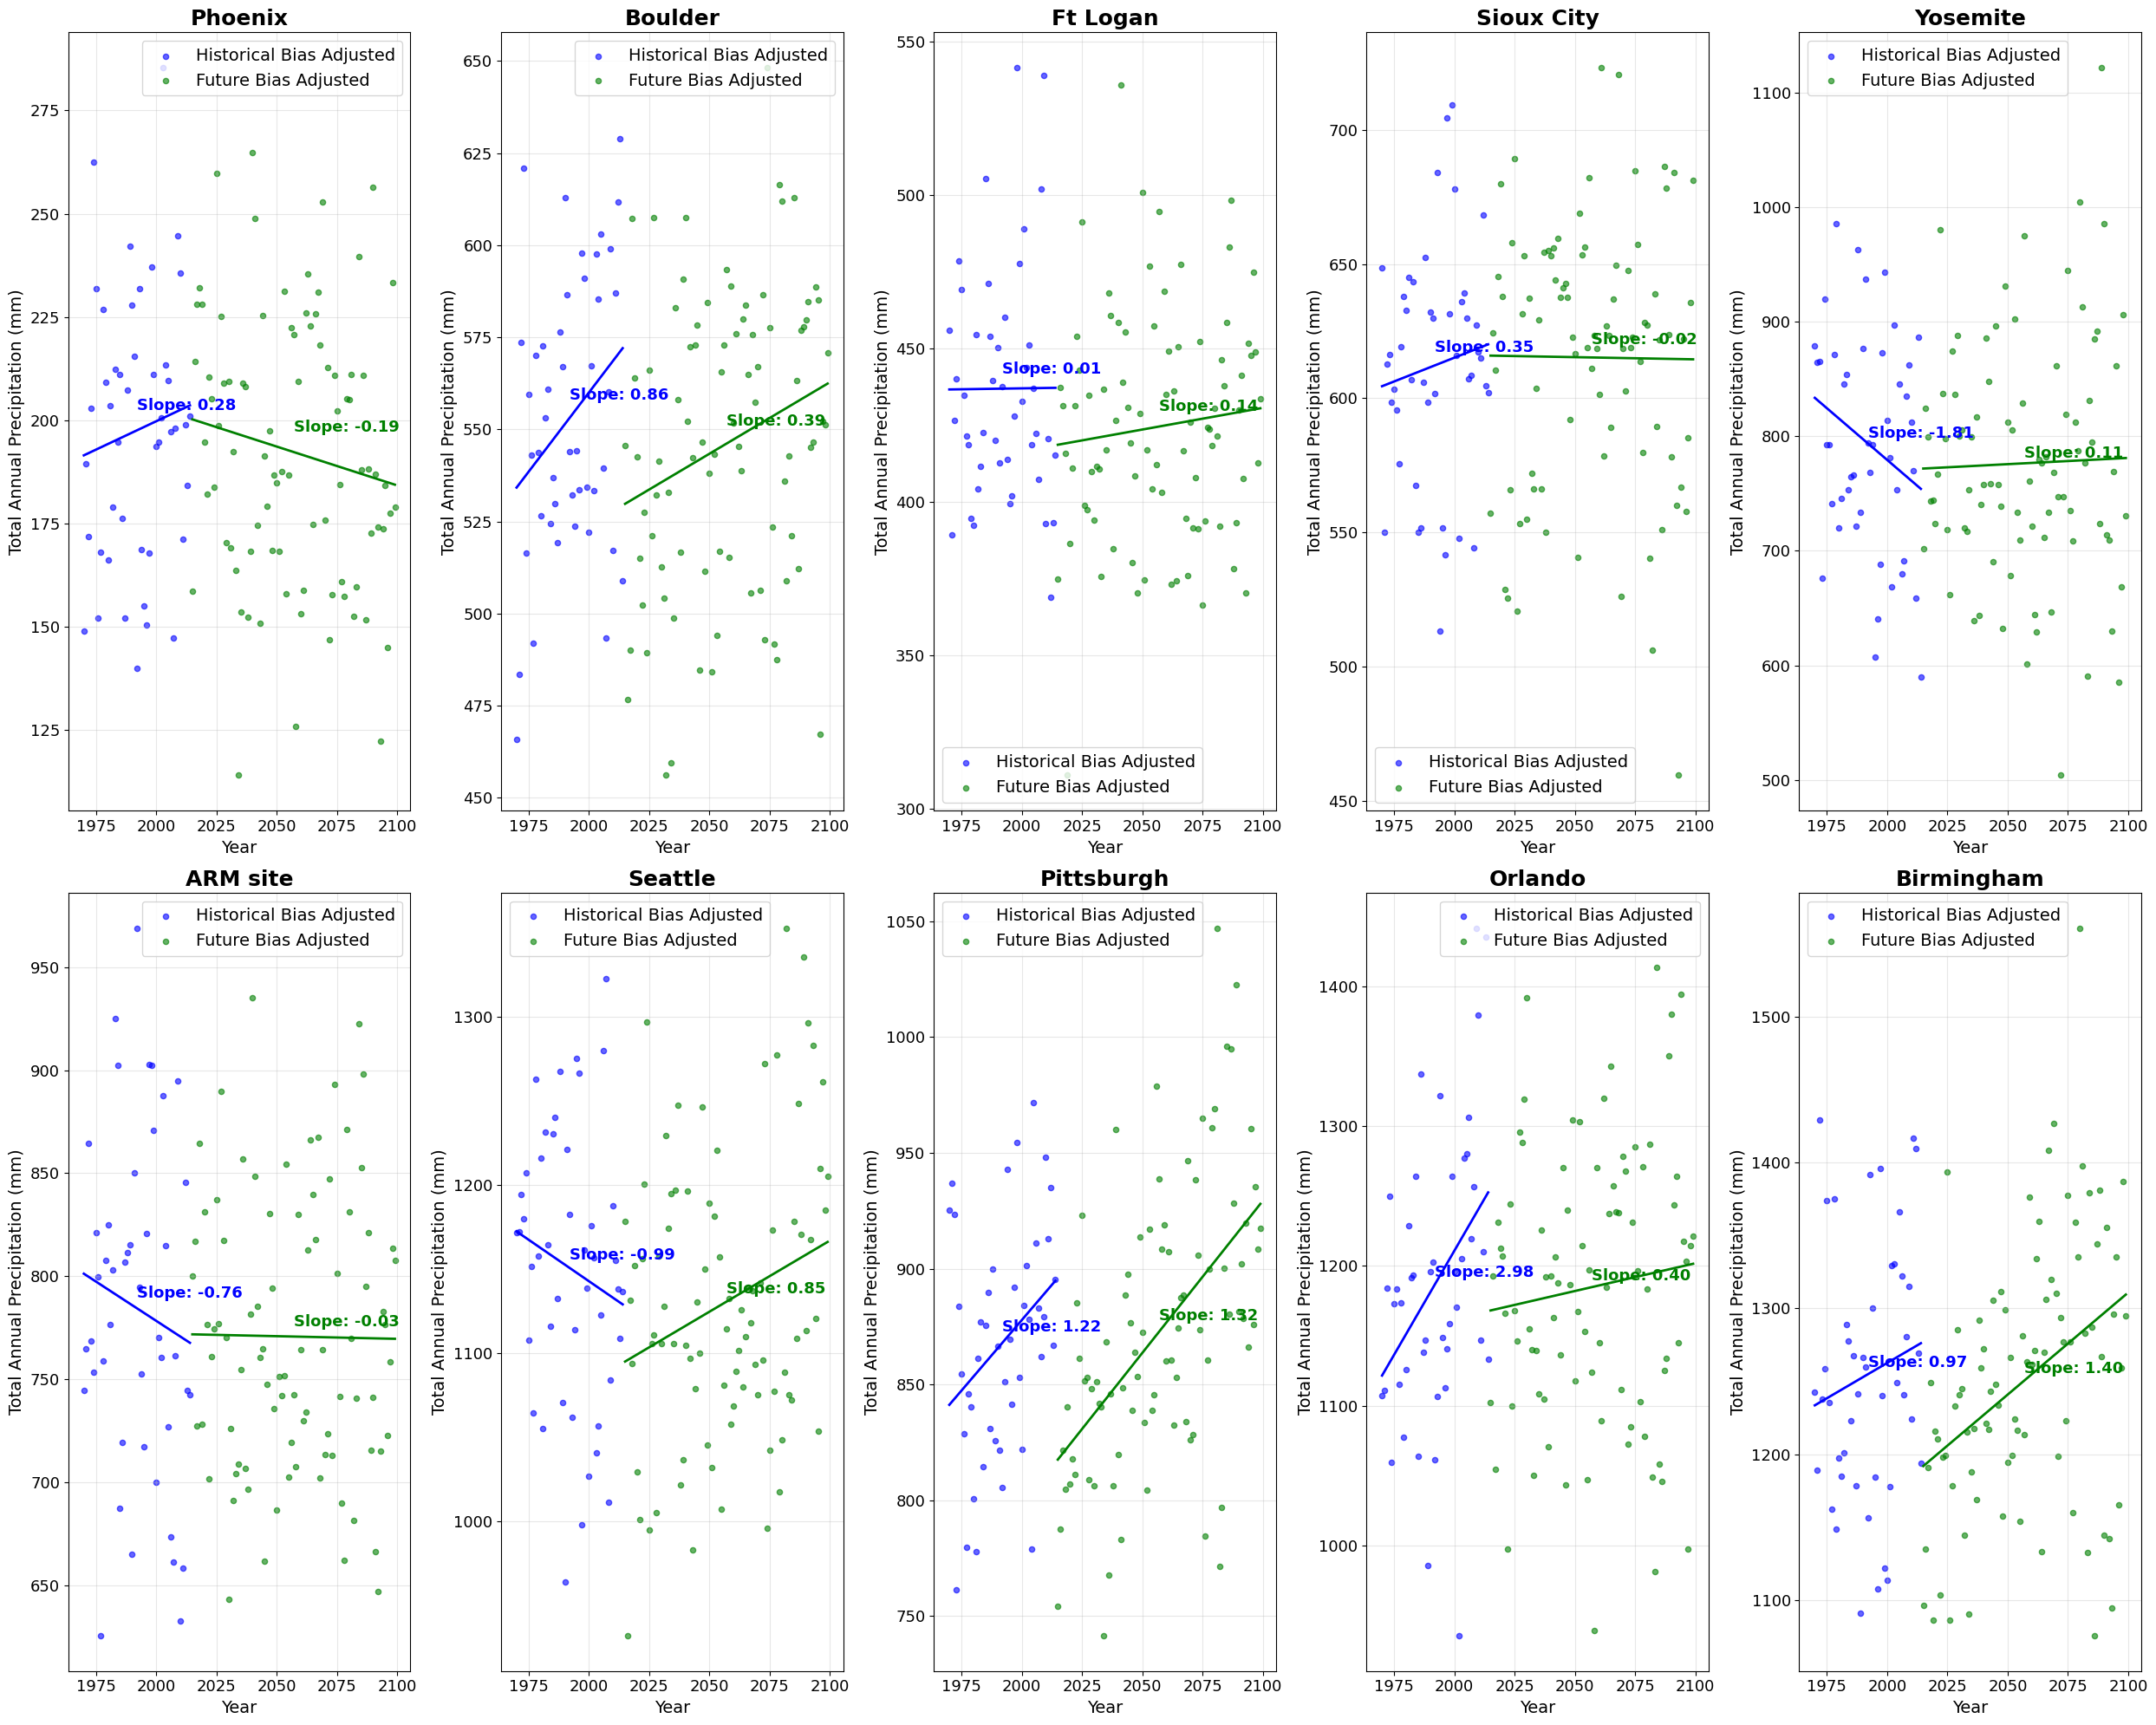

In [16]:
def get_trend(years, data):
    X = sm.add_constant(years)
    model = sm.OLS(data, X).fit()
    slope = model.params[1]
    ci = model.conf_int()[1]
    return slope, ci, model


def compare_trends(years1, p1, years2, p2):
    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"Historical Slope: {slope1:.4f}, 95% CI: {ci1}")
    print(f"Future Slope:     {slope2:.4f}, 95% CI: {ci2}")

    # Simple visual check of CI overlap
    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print("Slopes are significantly different (no CI overlap).")
    else:
        print("Slopes may not be significantly different (CI overlap).")

    return (slope1, ci1), (slope2, ci2)

def compare_trends_with_plot(ax, years1, p1, years2, p2, title="Trend Comparison", ylabel="Precipitation (mm)"):
    """Modified to plot on a given axis instead of creating new figure"""
    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"{title} - Historical Slope: {slope1:.4f}, 95% CI: {ci1}")
    print(f"{title} - Future Slope:     {slope2:.4f}, 95% CI: {ci2}")

    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print(f"{title} - Slopes are significantly different (no CI overlap).")
    else:
        print(f"{title} - Slopes may not be significantly different (CI overlap).")

    # Historical data + fit
    ax.scatter(years1, p1, color='blue', label='Historical Bias Adjusted', alpha=0.6, s=20)
    X1 = sm.add_constant(years1)
    ax.plot(years1, model1.predict(X1), color='blue', linewidth=2)
    
    # Historical trend label
    mid_x1 = np.mean(years1)
    mid_y1 = model1.predict([1, mid_x1])
    ax.text(mid_x1, mid_y1 + 5, f"Slope: {slope1:.2f}", color='blue', fontsize=13, fontweight='bold')

    # Future data + fit
    ax.scatter(years2, p2, color='green', label='Future Bias Adjusted', alpha=0.6, s=20)
    X2 = sm.add_constant(years2)
    ax.plot(years2, model2.predict(X2), color='green', linewidth=2)
    
    # Future trend label
    mid_x2 = np.mean(years2)
    mid_y2 = model2.predict([1, mid_x2])
    ax.text(mid_x2, mid_y2 + 5, f"Slope: {slope2:.2f}", color='green', fontsize=13, fontweight='bold')

    ax.set_title(f"{title}", fontsize=18, fontweight='bold')
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=13)

    return (slope1, ci1), (slope2, ci2)


# Replace with your real data
years = np.arange(1970, 2100)

# Slice historical and future
hist_mask = (years >= 1970) & (years <= 2014)
fut_mask = (years >= 2015) & (years <= 2099)

# Create big subplot figure for all cities - swapped rows and columns
n_cities = len(cities)
n_rows = 2  # Changed to 2 rows
n_cols = (n_cities + 1) // n_rows  # 5 columns

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5*n_cols, 20))
axes = axes.flatten()

for i in range(len(cities)):
    city_name = list(cities.keys())[i]
    print(f"\nCity: {city_name}")
    years_hist = years[hist_mask]
    years_fut = years[fut_mask]
    p_hist = annual_total_xt_local[i].mean(axis=1)
    p_fut = annual_total_future_xt_local[i].mean(axis=1)
    
    compare_trends_with_plot(axes[i], years_hist, p_hist, years_fut, p_fut, 
                            title=city_name, ylabel='Total Annual Precipitation (mm)')

# Remove any unused subplots
for j in range(i+1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(f'{save_path}trend_comparison_all_cities.png', dpi=300, bbox_inches='tight')
plt.show()


City: Phoenix
Phoenix - Historical Slope: 0.6224, 95% CI: [-2.3553, 3.6000]
Phoenix - Future Slope:     0.6783, 95% CI: [-0.4543, 1.8109]
Phoenix - Slopes may not be significantly different (CI overlap).

City: Boulder
Boulder - Historical Slope: 0.8738, 95% CI: [-1.7058, 3.4533]
Boulder - Future Slope:     -0.3904, 95% CI: [-1.1979, 0.4170]
Boulder - Slopes may not be significantly different (CI overlap).

City: Ft Logan
Ft Logan - Historical Slope: 0.0168, 95% CI: [-2.4236, 2.4572]
Ft Logan - Future Slope:     0.8473, 95% CI: [-0.1069, 1.8015]
Ft Logan - Slopes may not be significantly different (CI overlap).

City: Sioux City
Sioux City - Historical Slope: -4.1394, 95% CI: [-9.1480, 0.8691]
Sioux City - Future Slope:     -1.3993, 95% CI: [-2.9665, 0.1679]
Sioux City - Slopes may not be significantly different (CI overlap).

City: Yosemite
Yosemite - Historical Slope: -1.8314, 95% CI: [-4.5101, 0.8473]
Yosemite - Future Slope:     0.9329, 95% CI: [-0.2722, 2.1381]
Yosemite - Slopes 

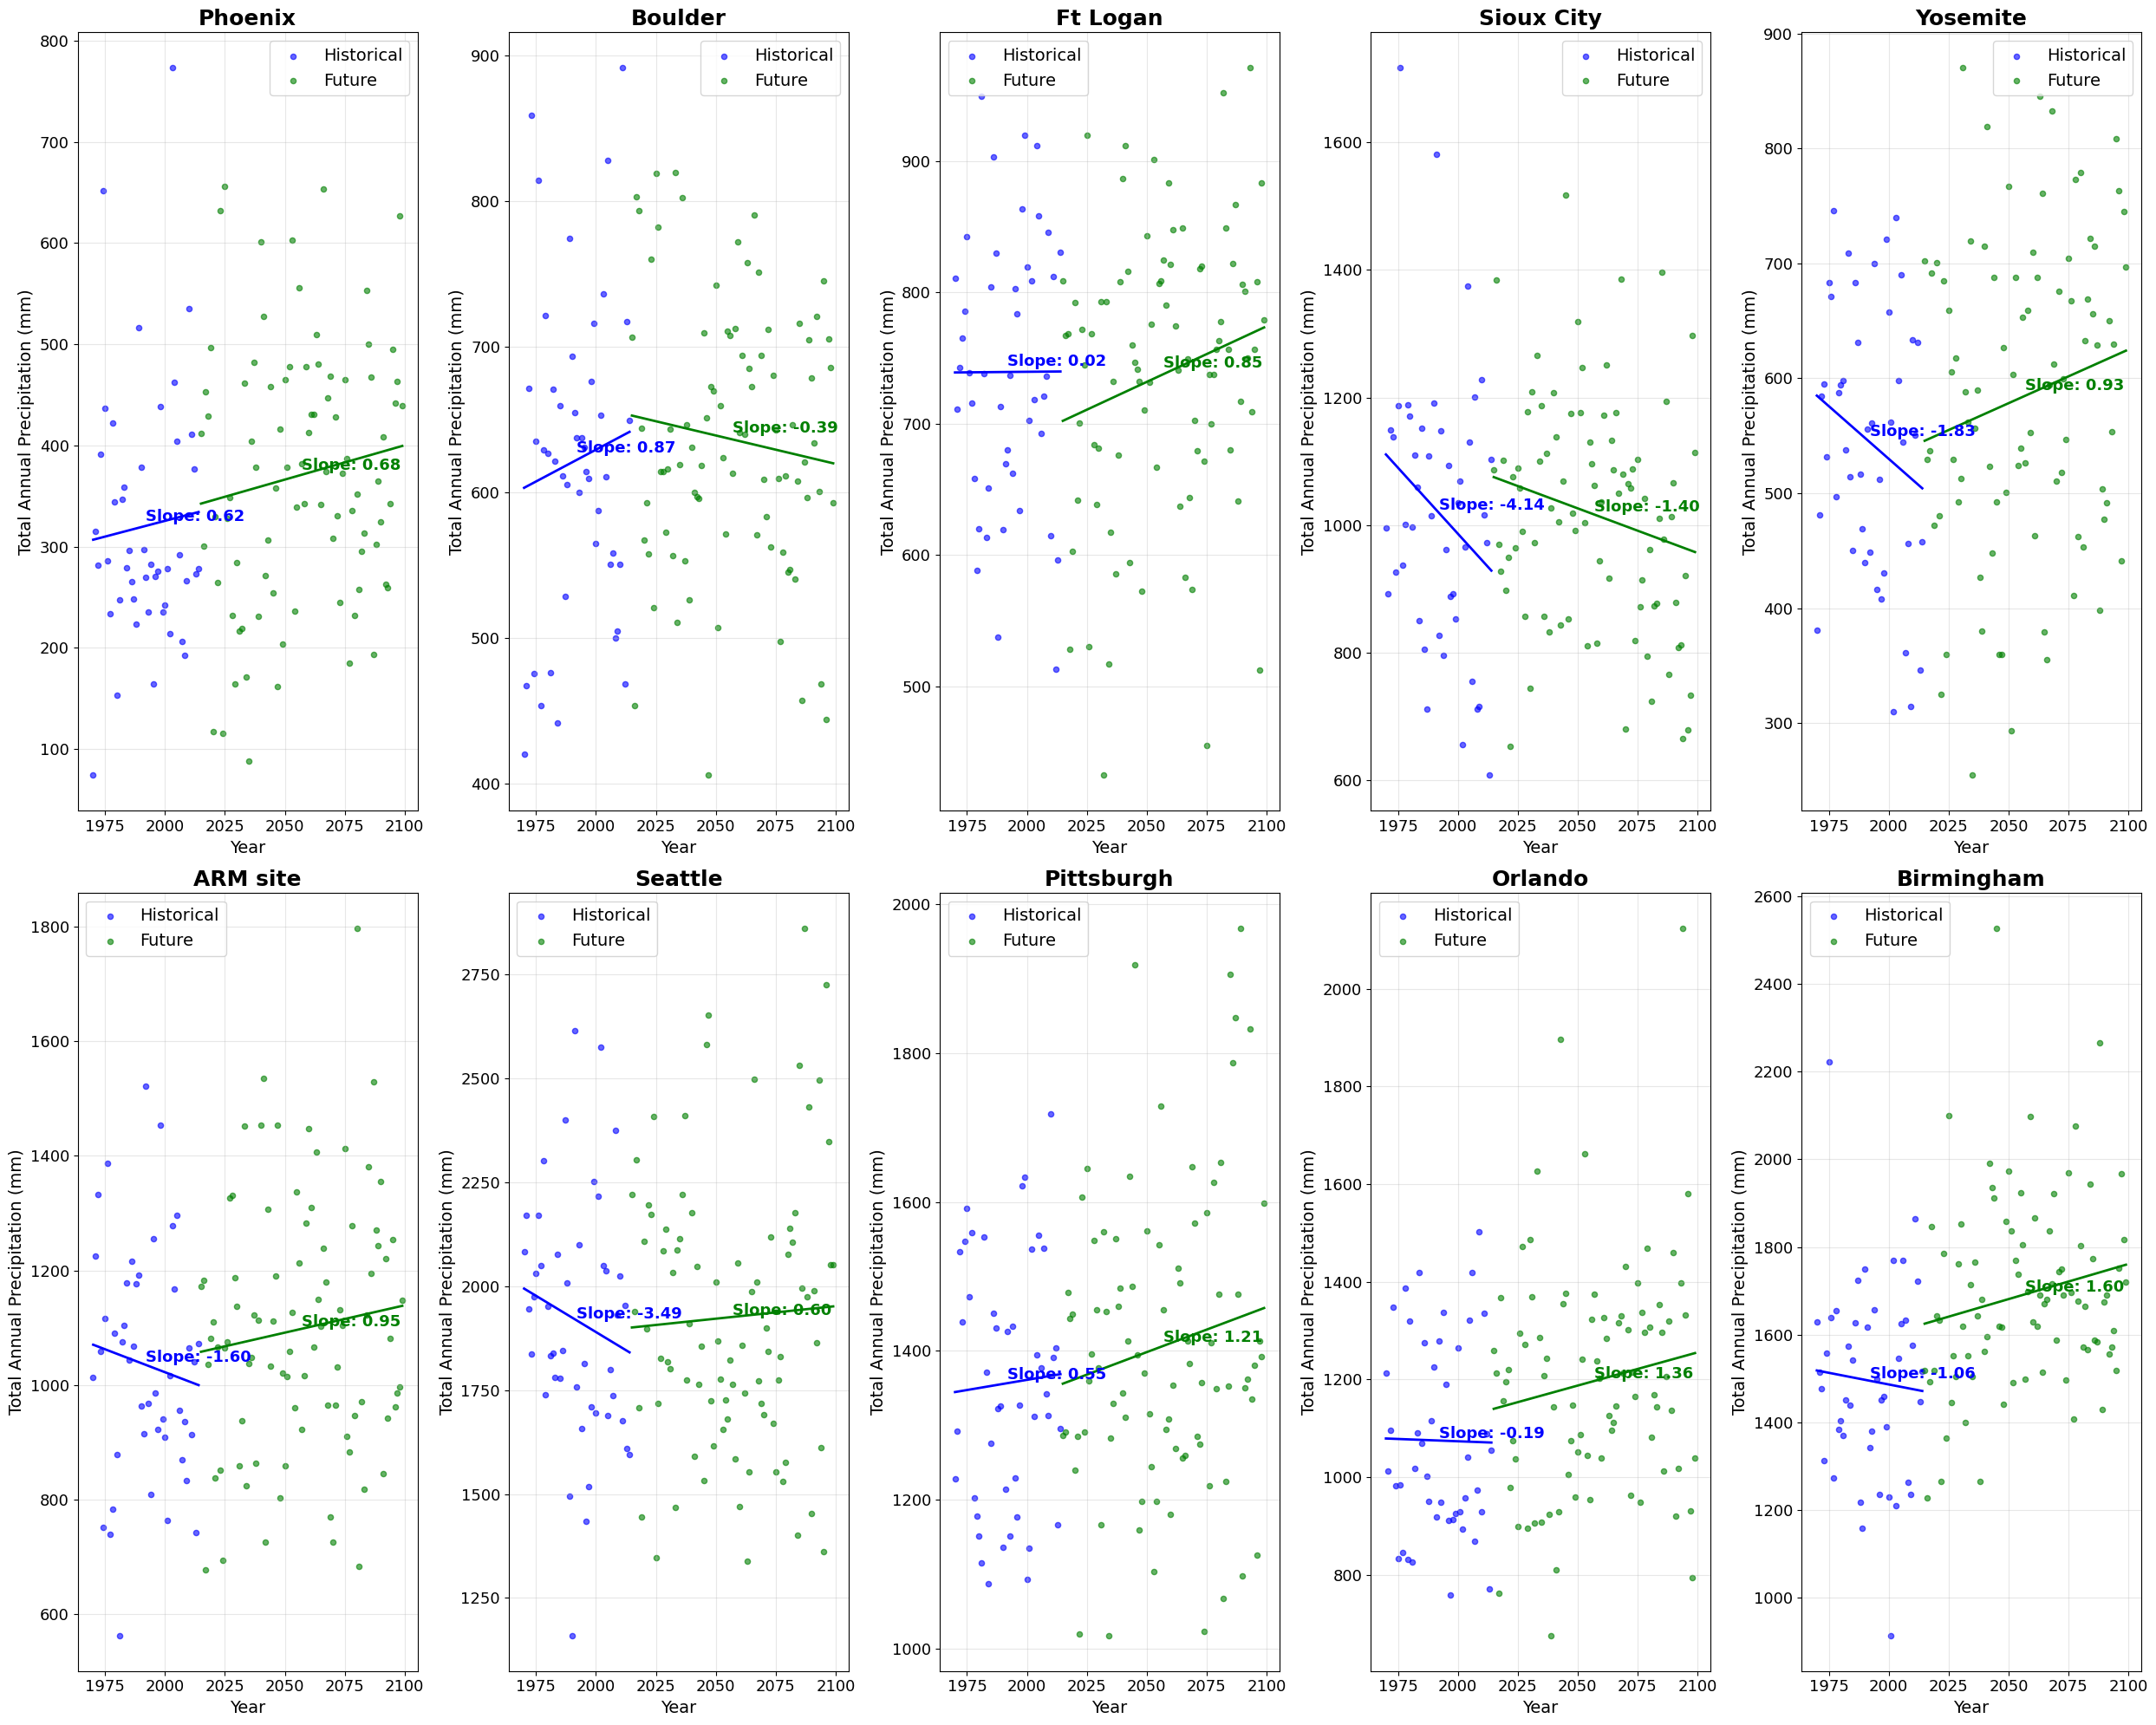

In [27]:

def get_trend(years, data):
    """Fit simple linear trend: data ~ a + b * year."""
    years = np.asarray(years)
    data = np.asarray(data)

    # Drop NaNs to avoid OLS crash
    mask = np.isfinite(years) & np.isfinite(data)
    years = years[mask]
    data = data[mask]

    X = sm.add_constant(years)         # shape (n, 2)
    model = sm.OLS(data, X).fit()
    slope = model.params[1]
    ci = model.conf_int()[1]           # 95% CI for slope
    return slope, ci, model


def compare_trends(years1, p1, years2, p2):
    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"Historical Slope: {slope1:.4f}, 95% CI: [{ci1[0]:.4f}, {ci1[1]:.4f}]")
    print(f"Future Slope:     {slope2:.4f}, 95% CI: [{ci2[0]:.4f}, {ci2[1]:.4f}]")

    # Simple CI overlap check
    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print("Slopes are significantly different (no CI overlap).")
    else:
        print("Slopes may not be significantly different (CI overlap).")

    return (slope1, ci1), (slope2, ci2)


def compare_trends_with_plot(ax, years1, p1, years2, p2,
                             title="Trend Comparison",
                             ylabel="Precipitation (mm)"):

    slope1, ci1, model1 = get_trend(years1, p1)
    slope2, ci2, model2 = get_trend(years2, p2)

    print(f"{title} - Historical Slope: {slope1:.4f}, 95% CI: [{ci1[0]:.4f}, {ci1[1]:.4f}]")
    print(f"{title} - Future Slope:     {slope2:.4f}, 95% CI: [{ci2[0]:.4f}, {ci2[1]:.4f}]")

    if ci1[1] < ci2[0] or ci2[1] < ci1[0]:
        print(f"{title} - Slopes are significantly different (no CI overlap).")
    else:
        print(f"{title} - Slopes may not be significantly different (CI overlap).")

    # Historical data + fit
    years1 = np.asarray(years1)
    p1 = np.asarray(p1)
    X1 = sm.add_constant(years1)
    y1_fit = model1.predict(X1)

    ax.scatter(years1, p1, color='blue', label='Historical',
               alpha=0.6, s=20)
    ax.plot(years1, y1_fit, color='blue', linewidth=2)

    mid_x1 = years1.mean()
    mid_y1 = model1.predict(np.array([[1.0, mid_x1]]))[0]
    ax.text(mid_x1, mid_y1 + 5, f"Slope: {slope1:.2f}",
            color='blue', fontsize=13, fontweight='bold')

    # Future data + fit
    years2 = np.asarray(years2)
    p2 = np.asarray(p2)
    X2 = sm.add_constant(years2)
    y2_fit = model2.predict(X2)

    ax.scatter(years2, p2, color='green', label='Future',
               alpha=0.6, s=20)
    ax.plot(years2, y2_fit, color='green', linewidth=2)

    mid_x2 = years2.mean()
    mid_y2 = model2.predict(np.array([[1.0, mid_x2]]))[0]
    ax.text(mid_x2, mid_y2 + 5, f"Slope: {slope2:.2f}",
            color='green', fontsize=13, fontweight='bold')

    ax.set_title(title, fontsize=18, fontweight='bold')
    ax.set_xlabel("Year", fontsize=14)
    ax.set_ylabel(ylabel, fontsize=14)
    ax.legend(fontsize=14)
    ax.grid(True, alpha=0.3)
    ax.tick_params(axis='both', which='major', labelsize=13)

    return (slope1, ci1), (slope2, ci2)


# ---------- plotting for all cities ----------

years = np.arange(1970, 2100)

hist_mask = (years >= 1970) & (years <= 2014)
fut_mask  = (years >= 2015) & (years <= 2099)

years_hist = years[hist_mask]
years_fut  = years[fut_mask]

n_cities = len(cities)
n_rows = 2
n_cols = (n_cities + 1) // n_rows   # e.g. 10 -> 5

fig, axes = plt.subplots(n_rows, n_cols, figsize=(5 * n_cols, 20))
axes = axes.flatten()

for i, (city_name, _) in enumerate(cities.items()):
    print(f"\nCity: {city_name}")

    # These should have shapes matching years_hist / years_fut respectively
    # annual_total_xt_local[i] : (N_hist_years, n_models)
    # annual_total_future_xt_local[i] : (N_fut_years, n_models)
    p_hist = annual_total_x_local[i][:,0]
    p_fut  = annual_total_future_x_local[i][:,0]

    compare_trends_with_plot(
        axes[i],
        years_hist, p_hist,
        years_fut,  p_fut,
        title=city_name,
        ylabel='Total Annual Precipitation (mm)'
    )

# Remove any unused subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.savefig(f"{save_path}trend_comparison_all_cities.png",
            dpi=300, bbox_inches='tight')
plt.show()


## Ibicus (Simple Way)

In [6]:
## prepare a function to calculate bias between trend of y and x
def calculate_trend_bias(y, x):
    """ 
    Calculate the bias between the trend of y and x.
    Parameters:
        y (np.ndarray): The observed data.
        x (np.ndarray): The model data.
        
    Returns:
        bias (float): The calculated bias.
    """
    y_trend = np.mean(y, axis=0)
    x_trend = np.mean(x, axis=0)
    
    bias = x_trend - y_trend
    
    return bias 

In [ ]:

interp_coords = []
ensemble_coords = valid_coords[2]
for coords in valid_coords:
    interp_coords.append(find_nearest_indices(ensemble_coords, coords))



# Initialize climate indices manager
climate_indices = ClimateIndices()

thresholds = climate_indices.get_indices()

future_x_ensemble_indices = {}
x_ensemble_indices = {}

# y_ensemble_indices = {}
future_xt_ensemble_indices = {}
future_loca_ensemble_indices = {}
future_QM_ensemble_indices = {}

counter = 0 
for model in models:
    model['future_time'] = np.array([np.datetime64(t) for t in model['future_time']])

    for label, (threshold, comparison) in thresholds.items():
        if callable(threshold):  # If function, apply it to y
            model[f'{label}_x'] = threshold(model['x_time_np'], model['x'])

            model[f'{label}_future_x'] = threshold(model['future_time'], model['future_x'])
            model[f'{label}_future_xt'] = threshold(model['future_time'], model['future_xt'])
            # model[f'{label}_future_loca'] = threshold(model['future_time'], loca_future_all[counter])
            model[f'{label}_future_QM'] = threshold(model['future_time'], QM_future_all[counter])

            if label not in future_x_ensemble_indices:
                x_ensemble_indices[label] = model[f'{label}_x'][:, interp_coords[counter][0]]/len(models)
                future_x_ensemble_indices[label] = model[f'{label}_future_x'][:, interp_coords[counter][0]]/len(models)
                future_xt_ensemble_indices[label] = model[f'{label}_future_xt'][:, interp_coords[counter][0]]/len(models)
                # future_loca_ensemble_indices[label] = model[f'{label}_future_loca'][:, interp_coords[counter][0]]/len(models)
                future_QM_ensemble_indices[label] = model[f'{label}_future_QM'][:, interp_coords[counter][0]]/len(models)
            else:
                x_ensemble_indices[label]+= model[f'{label}_x'][:, interp_coords[counter][0]]/len(models)
                future_x_ensemble_indices[label]+= model[f'{label}_future_x'][:, interp_coords[counter][0]]/len(models)
                future_xt_ensemble_indices[label]+= model[f'{label}_future_xt'][:, interp_coords[counter][0]]/len(models)
                # future_loca_ensemble_indices[label]+= model[f'{label}_future_loca'][:, interp_coords[counter][0]]/len(models)
                future_QM_ensemble_indices[label]+= model[f'{label}_future_QM'][:, interp_coords[counter][0]]/len(models)
    counter+=1

In [ ]:
trend_bias_dict = {}

for label, (threshold, comparison) in thresholds.items():
    if callable(threshold):
        x_bias = calculate_trend_bias(x_ensemble_indices[label], future_x_ensemble_indices[label])

        xt_bias = calculate_trend_bias(x_ensemble_indices[label], future_xt_ensemble_indices[label])
        # loca_bias = calculate_trend_bias(x_ensemble_indices[label], future_loca_ensemble_indices[label])
        QM_bias = calculate_trend_bias(x_ensemble_indices[label], future_QM_ensemble_indices[label])

        # trend_bias_dict[label] = (x_bias, xt_bias, loca_bias, QM_bias)
        trend_bias_dict[label] = (x_bias, xt_bias)

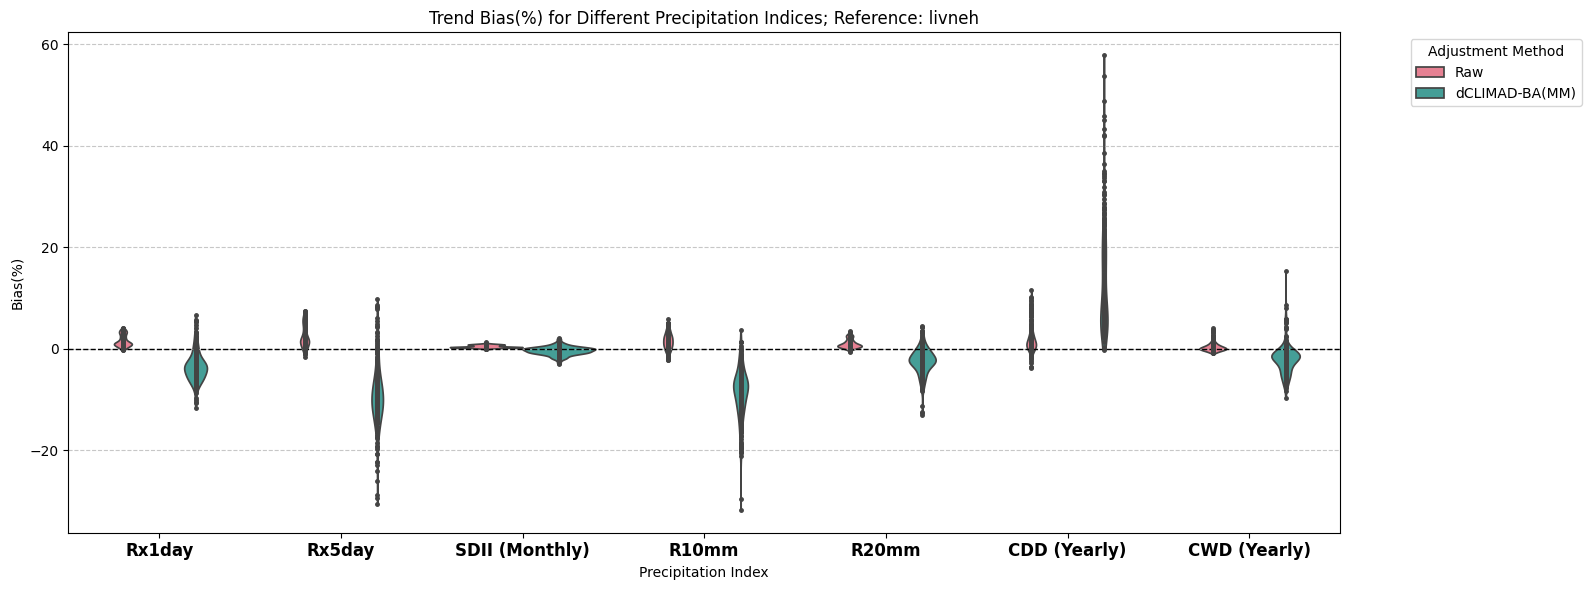

In [11]:
keys = ['SDII (Monthly)','CDD (Yearly)', 'CWD (Yearly)', "Rx1day", "Rx5day", "R10mm",  "R20mm"]
d = dict(filter(lambda item: item[0] in keys , trend_bias_dict.items()))



# Create a 2x2 subplot figure
fig, axes = plt.subplots(1, 1, figsize=(16, 6), sharey=True)


ref_label = models[0]['config']['ref']
method_names = ['dCLIMAD-BA(MM)'] 
# Call the function for each dataset
plot_violin_bias(axes, d, "Bias(%)", f"Trend Bias(%) for Different Precipitation Indices; Reference: {ref_label}",  method_names=method_names, remove_outlier=True)

# plot_violin_bias(axes[1], d4, "Bias(%)", "Day Bias(%) for Different Precipitation Indices",  method_names=method_names, remove_outlier=True)
# fig.suptitle(f'Ensemble-Livneh', fontsize=20, fontweight="bold", y=1.02)


plt.tight_layout()
plt.savefig(f'{save_path}future_violin_Pindices.png')

plt.show()